In [2]:
#@authors: Isabel Burgos, Francesca Drummer, Lennart Geertjes, Madelief Rennspies, Ellen Schrader
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(4.5,3)})
# import distributions
from scipy.stats import *
import numpy as np

In [3]:
#This function returns the feature of the tile flipped and the object below it. 
#Theta = vector of category probabilities of the features
#Psi = vector of category probabilities of the objects given the features (deterministic)
#The number of objects n and features k is included implicitly in the size of the corresponding arrays
def environment(theta1, theta2, psi):
    #Draw feature from a categorical distribution
    feature = np.array(multinomial.rvs(p = theta1,n = 1))
    spatial = np.array(multinomial.rvs(p = theta2,n = 1))
    
    #Get index of spatial location and feature (starting at 0)
    idx_feature = list(feature).index(1)
    idx_spatial = list(spatial).index(1)
    
    #Draw the object from a categorical distribution given the feature
    obj     = multinomial.rvs(p = psi[idx_feature,idx_spatial].flatten(), n=1)
    
    #Get index of object (starting at 0)
    idx_object  = list(obj).index(1)
    
    return idx_feature, idx_spatial, idx_object

In [4]:
#Model of the agent. The function returns the predicted probability distribution over the objects given the features
#and the index of the predicted object
#Note: we might not need the predicted object and the index of the object itself but it is still included as it might
#be useful for some of us
def agent(psi,alpha,idx_feature, idx_spatial):
    psi[idx_feature,idx_spatial] = dirichlet.rvs(alpha[idx_feature,idx_spatial])
    obj = multinomial.rvs(p=psi[idx_feature,idx_spatial], n=1)
    idx_object  = list(obj).index(1)
    return psi, idx_object

In [5]:
#The agent learns the probability distribution of the objects given a specific feature
#n_iter = the number of iterations in this observations the agent sees
#n_objects = the number of objects
#n_features = the number of features and thus also of tiles

def trial(n_iter, n_objects, n_features, n_spatial,psi_env):
    ####Initial values###
    alpha = np.full((n_features,n_spatial,n_objects),1)
    pre_errors = [[[] for _ in range(n_spatial)] for _ in range(n_features)]
    psi_agent = np.full((n_features,n_spatial,n_objects), 1/n_objects)
    #If you want specific features to occur more often change e.g., to theta = [0.8,0.1,0.1]
    theta1 = np.repeat(1/n_features,n_features)
    theta2 = np.repeat(1/n_spatial, n_spatial)
    
    ###Updating the agent's generative model###
    for i in range(0,n_iter):
        
        #Get feature and observation from environment
        idx_feature, idx_spatial, idx_object = environment(theta1,theta2,psi_env)
        
        #Prediction of the agent
        psi_agent, _ =  agent(psi_agent,alpha,idx_feature, idx_spatial)
        
        #Calculate prediction error using relative entropy (Kullback-Leibler divergence)
        pre_err=entropy(psi_agent[idx_feature,idx_spatial],psi_env[idx_feature,idx_spatial], base=None)
        pre_errors[idx_feature][idx_spatial].append(pre_err)
        
        #Updating hyperparameters
        alpha[idx_feature, idx_spatial, idx_object]+=1    
    return psi_agent,alpha, pre_errors

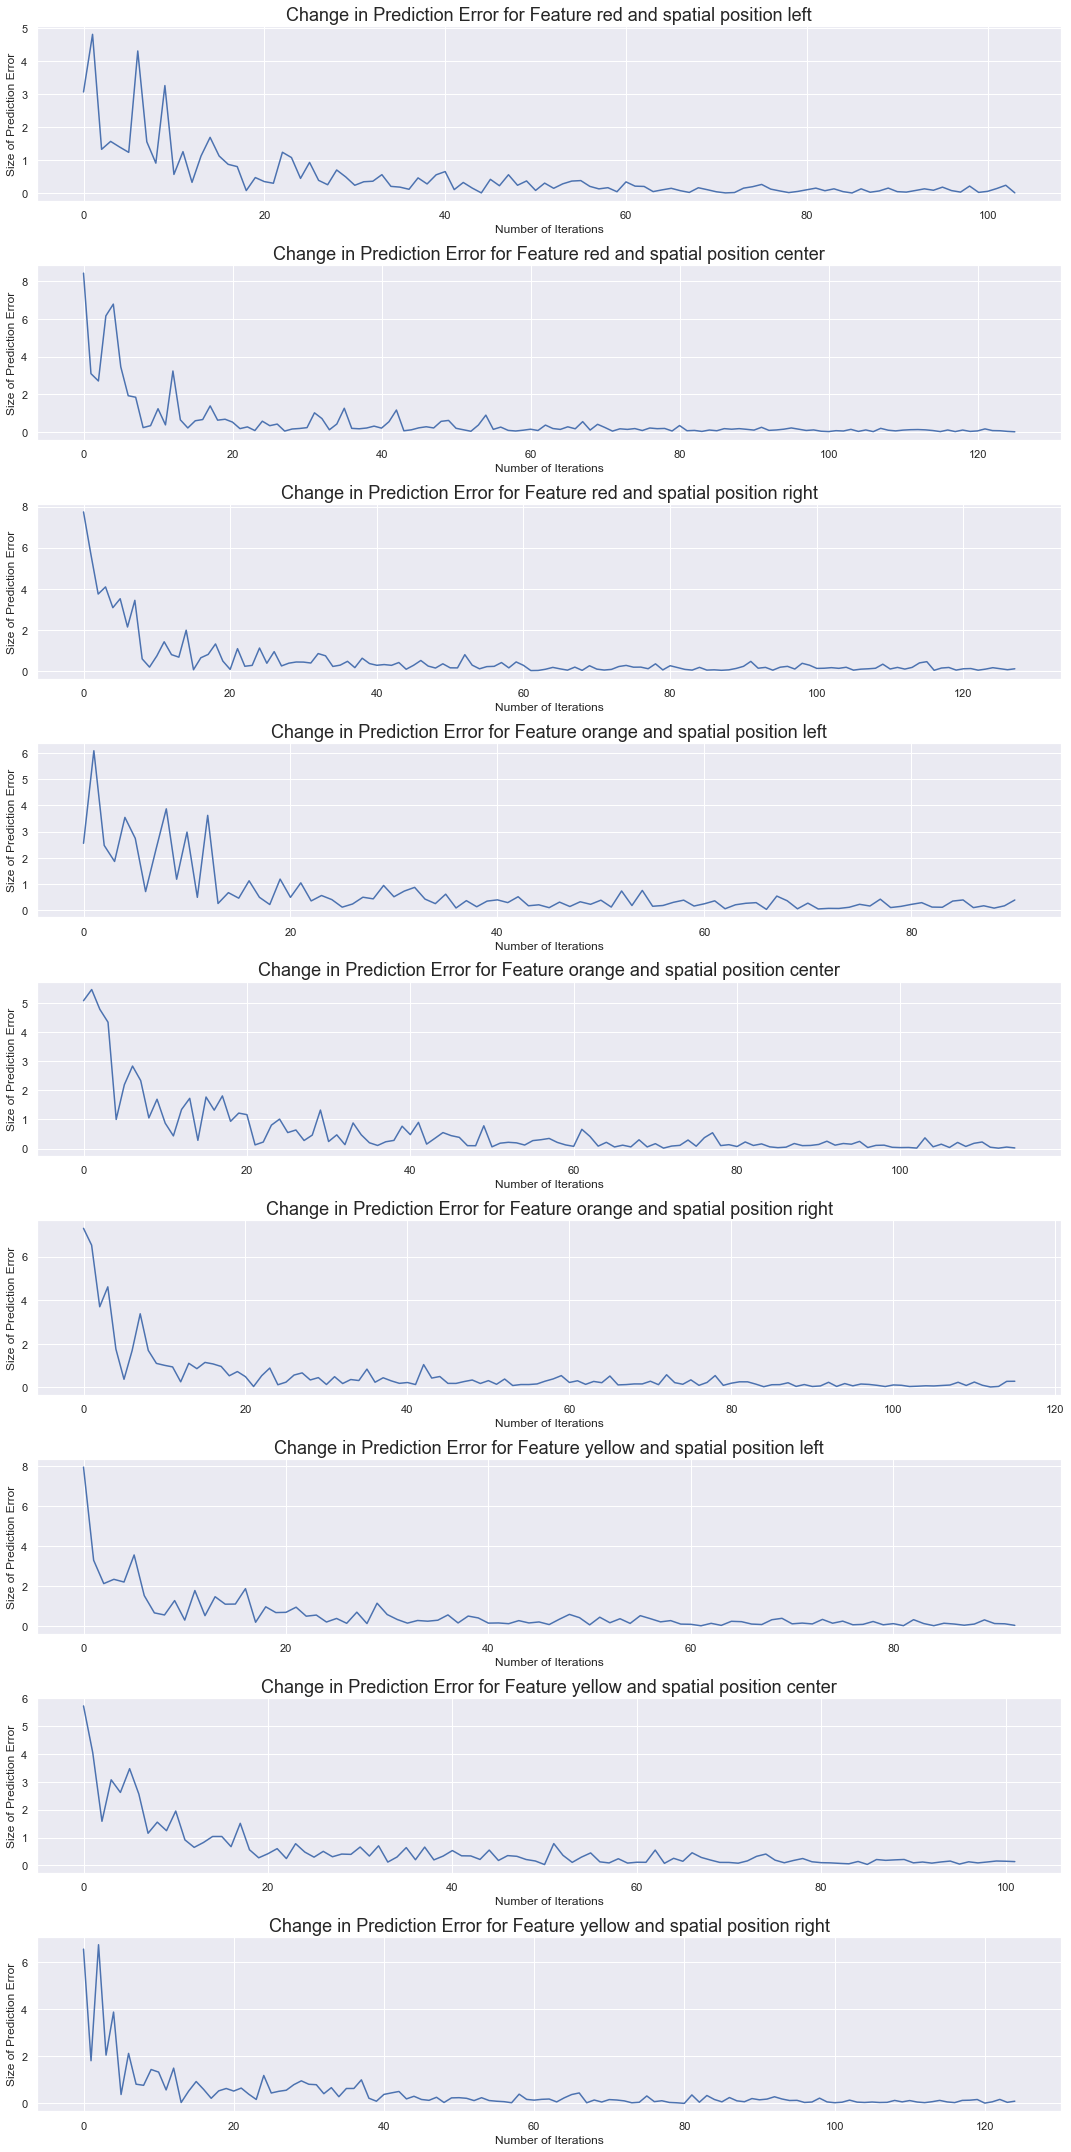

In [6]:
###Running the simulation###

#The environment is supposed to be deterministic but 
#due to the nature of Kullback Leibler divergence the probabilities cannot be zero.
psi_env = np.array([[[0.9997,0.0001,0.0001, 0.0001],[0.0001,0.0001,0.0001,0.9997],[0.9997,0.0001,0.0001, 0.0001]],
                    [[0.0001,0.9997,0.0001, 0.0001],[0.0001,0.0001,0.0001,0.9997],[0.0001,0.9997,0.0001, 0.0001]],
                    [[0.0001,0.0001,0.9997, 0.0001],[0.0001,0.0001,0.0001,0.9997],[0.0001,0.0001,0.9997, 0.0001]]])
f_names = ["red", "orange", "yellow"]
s_names = ["left", "center", "right"]
o_names = ["circle", "square", "triangle", "star"]
psi_agent,alpha, pre_errors =trial(1000,4,3,3,psi_env)
fig, ax = plt.subplots(9, 1, figsize=(15,30))
for i in range(0,3):
    for j in range(0,3):
        ax[3*i+j].plot(pre_errors[i][j])
        ax[3*i+j].set_title("Change in Prediction Error for Feature {} and spatial position {}".format(f_names[i], s_names[j]), fontsize=18)    
        ax[3*i+j].set_xlabel("Number of Iterations")
        ax[3*i+j].set_ylabel("Size of Prediction Error")
fig.tight_layout()

In [37]:
print ([[[]]*2]*3)

p=np.array([[[1]]])
p[0][0,:]

[[[], []], [[], []], [[], []]]
